## Typical Day Study - January

In [ ]:
import pandas as pd
import numpy as np

# Import station info
station_2019 = pd.read_csv('D:\Bike\data\station\station2019.csv', delimiter=',')
station_2019 = station_2019['station name'].to_list()
station_2020 = pd.read_csv('D:\Bike\data\station\station2020.csv', delimiter=',')
station_2020 = station_2020['station name'].to_list()
station_2021 = pd.read_csv('D:\Bike\data\station\station2021.csv', delimiter=',')
station_2021 = station_2021['station name'].to_list()

In [12]:
frame = []
months = ['01']
for month in months:
        df = pd.read_csv("D:/Bike/data/2019/2019"+month+"-citibike-tripdata.csv", delimiter=',')
        df = df[['tripduration', 'starttime',
         'start station name', 'end station name', 'usertype']]
        df = df[(df['start station name'].isin(station_2019))
        & (df['end station name'].isin(station_2019))]
        df = df.drop(labels=['start station name', 'end station name'], axis=1)
        df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d')
        df['hour'] = df['starttime'].dt.hour  # 开始时间（几点）
        df['day'] = df['starttime'].dt.dayofweek + 1  # 周几
        df['starttime'] = df['starttime'].apply(lambda x: x.strftime('%Y%m%d'))
        df = df[(df['tripduration'] <= 3600*6) & (df['tripduration'] >= 60)]
        frame.append(df)
key_2019 = pd.concat(frame)

In [13]:
frame = []
months = ['01']
for month in months:
        df = pd.read_csv("D:/Bike/data/2020/2020"+month+"-citibike-tripdata.csv", delimiter=',')
        df = df[['tripduration', 'starttime',
         'start station name', 'end station name', 'usertype']]
        df = df[(df['start station name'].isin(station_2019))
        & (df['end station name'].isin(station_2019))]
        df = df.drop(labels=['start station name', 'end station name'], axis=1)
        df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d')
        df['hour'] = df['starttime'].dt.hour  # 开始时间（几点）
        df['day'] = df['starttime'].dt.dayofweek + 1  # 周几
        df['starttime'] = df['starttime'].apply(lambda x: x.strftime('%Y%m%d'))
        df = df[(df['tripduration'] <= 3600*6) & (df['tripduration'] >= 60)]
        frame.append(df)
key_2020 = pd.concat(frame)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230570 entries, 0 to 1240595
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   tripduration  1230570 non-null  int64 
 1   starttime     1230570 non-null  object
 2   usertype      1230570 non-null  object
 3   hour          1230570 non-null  int64 
 4   day           1230570 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 56.3+ MB


In [15]:
frame = []
months = ['01']
for month in months:
        df = pd.read_csv("D:/Bike/data/2021/2021"+month+"-citibike-tripdata.csv", delimiter=',')
        df = df[['tripduration', 'starttime',
         'start station name', 'end station name', 'usertype']]
        df = df[(df['start station name'].isin(station_2019))
        & (df['end station name'].isin(station_2019))]
        df = df.drop(labels=['start station name', 'end station name'], axis=1)
        df['starttime'] = pd.to_datetime(df['starttime'], format='%Y-%m-%d')
        df['hour'] = df['starttime'].dt.hour  # 开始时间（几点）
        df['day'] = df['starttime'].dt.dayofweek + 1  # 周几
        df['starttime'] = df['starttime'].apply(lambda x: x.strftime('%Y%m%d'))
        df = df[(df['tripduration'] <= 3600*6) & (df['tripduration'] >= 60)]
        frame.append(df)
key_2021 = pd.concat(frame)


### 2019 - Data Cleaning for weekday and weekends and weather

In [16]:
weather = pd.read_csv(
    'D:\Bike\data\weather\KNYC 2019-01-01 to 2021-12-31.csv', delimiter=',')
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')
weather = weather[(weather['datetime'] >= pd.Timestamp(2019, 1, 1)) & (
    weather['datetime'] <= pd.Timestamp(2019, 1, 31))]
weather = weather[['datetime', 'precipprob']]
weather = weather[weather['precipprob'] == 0]
weather['day'] = weather['datetime'].dt.dayofweek + 1
weather['day'] = np.where(weather['day']<=5,'weekday','weekend')
weather['day'] = np.where(weather['datetime']=='20190101','weekend',weather['day'])
weather['day'] = np.where(weather['datetime']=='20190121','weekend',weather['day'])
weather['norain'] = weather['datetime'].apply(lambda x: x.strftime('%Y%m%d'))
day_2019 = weather['day'].value_counts().to_dict() # day_2019['weekday']= 35  day_2019['weekend']= 20
norain_2019 = weather['norain'].tolist()

In [17]:
df_2019 = key_2019[key_2019['starttime'].isin(norain_2019)]
df_2019['day'] = np.where(df_2019['day']<=5,'weekday','weekend')
df_2019['day'] = np.where(df_2019['starttime']=='20190704','weekend',df_2019['day']) # 修改法定节假日
df_2019_Sub = df_2019[df_2019['usertype'] == 'Subscriber']
df_2019_Cus = df_2019[df_2019['usertype'] == 'Customer']
df_2019_Sub_wk = df_2019_Sub[df_2019_Sub['day'] == 'weekday']
df_2019_Sub_wd = df_2019_Sub[df_2019_Sub['day'] == 'weekend']
df_2019_Cus_wk = df_2019_Cus[df_2019_Cus['day'] == 'weekday']
df_2019_Cus_wd = df_2019_Cus[df_2019_Cus['day'] == 'weekend']

C:\Users\24707\AppData\Local\Temp\ipykernel_22376\3397255596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['day'] = np.where(df_2019['day']<=5,'weekday','weekend')
C:\Users\24707\AppData\Local\Temp\ipykernel_22376\3397255596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['day'] = np.where(df_2019['starttime']=='20190704','weekend',df_2019['day']) # 修改法定节假日


In [18]:
hourcount_2019_Sub_wk = df_2019_Sub_wk['hour'].value_counts().sort_index()
hourcount_2019_Sub_wk = hourcount_2019_Sub_wk.to_frame()
hourcount_2019_Sub_wk = hourcount_2019_Sub_wk.reset_index()
hourcount_2019_Sub_wk.rename(
    columns={'index': 'hour', 'hour': 'counts_2019'}, inplace=True)
hourcount_2019_Sub_wk['counts_2019'] = hourcount_2019_Sub_wk['counts_2019']/day_2019['weekday']

hourcount_2019_Sub_wd = df_2019_Sub_wd['hour'].value_counts().sort_index()
hourcount_2019_Sub_wd = hourcount_2019_Sub_wd.to_frame()
hourcount_2019_Sub_wd = hourcount_2019_Sub_wd.reset_index()
hourcount_2019_Sub_wd.rename(
    columns={'index': 'hour', 'hour': 'counts_2019'}, inplace=True)
hourcount_2019_Sub_wd['counts_2019'] = hourcount_2019_Sub_wd['counts_2019']/day_2019['weekend']

hourcount_2019_Cus_wk = df_2019_Cus_wk['hour'].value_counts().sort_index()
hourcount_2019_Cus_wk = hourcount_2019_Cus_wk.to_frame()
hourcount_2019_Cus_wk = hourcount_2019_Cus_wk.reset_index()
hourcount_2019_Cus_wk.rename(
    columns={'index': 'hour', 'hour': 'counts_2019'}, inplace=True)
hourcount_2019_Cus_wk['counts_2019'] = hourcount_2019_Cus_wk['counts_2019']/day_2019['weekday']

hourcount_2019_Cus_wd = df_2019_Cus_wd['hour'].value_counts().sort_index()
hourcount_2019_Cus_wd = hourcount_2019_Cus_wd.to_frame()
hourcount_2019_Cus_wd = hourcount_2019_Cus_wd.reset_index()
hourcount_2019_Cus_wd.rename(
    columns={'index': 'hour', 'hour': 'counts_2019'}, inplace=True)
hourcount_2019_Cus_wd['counts_2019'] = hourcount_2019_Cus_wd['counts_2019']/day_2019['weekend']


### 2020 - Data Cleaning for weekday and weekends and weather


In [19]:
weather = pd.read_csv(
    'D:\Bike\data\weather\KNYC 2019-01-01 to 2021-12-31.csv', delimiter=',')
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')
weather = weather[(weather['datetime'] >= pd.Timestamp(2020, 1, 1)) & (
    weather['datetime'] <= pd.Timestamp(2020, 1, 31))]
weather = weather[['datetime', 'precipprob']]
weather = weather[weather['precipprob'] == 0]
weather['day'] = weather['datetime'].dt.dayofweek + 1
weather['day'] = np.where(weather['day']<=5,'weekday','weekend')
weather['day'] = np.where(weather['datetime']=='20200101','weekend',weather['day']) # 假日
weather['day'] = np.where(weather['datetime']=='20200120','weekend',weather['day']) # 假日
weather['norain'] = weather['datetime'].apply(lambda x: x.strftime('%Y%m%d'))
day_2020 = weather['day'].value_counts().to_dict() # day_2020['weekday']= int  day_2020['weekend']= int
norain_2020 = weather['norain'].tolist()
norain_2020

['20200101',
 '20200102',
 '20200105',
 '20200107',
 '20200108',
 '20200109',
 '20200110',
 '20200111',
 '20200113',
 '20200115',
 '20200117',
 '20200119',
 '20200120',
 '20200121',
 '20200122',
 '20200123',
 '20200124',
 '20200126',
 '20200127',
 '20200128',
 '20200129',
 '20200130']

In [20]:
df_2020 = key_2020[key_2020['starttime'].isin(norain_2020)]
df_2020['day'] = np.where(df_2020['day']<=5,'weekday','weekend')
df_2020_Sub = df_2020[df_2020['usertype'] == 'Subscriber']
df_2020_Cus = df_2020[df_2020['usertype'] == 'Customer']
df_2020_Sub_wk = df_2020_Sub[df_2020_Sub['day'] == 'weekday']
df_2020_Sub_wd = df_2020_Sub[df_2020_Sub['day'] == 'weekend']
df_2020_Cus_wk = df_2020_Cus[df_2020_Cus['day'] == 'weekday']
df_2020_Cus_wd = df_2020_Cus[df_2020_Cus['day'] == 'weekend']

C:\Users\24707\AppData\Local\Temp\ipykernel_22376\2715920991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['day'] = np.where(df_2020['day']<=5,'weekday','weekend')


In [21]:
hourcount_2020_Sub_wk = df_2020_Sub_wk['hour'].value_counts().sort_index()
hourcount_2020_Sub_wk = hourcount_2020_Sub_wk.to_frame()
hourcount_2020_Sub_wk = hourcount_2020_Sub_wk.reset_index()
hourcount_2020_Sub_wk.rename(
    columns={'index': 'hour', 'hour': 'counts_2020'}, inplace=True)
hourcount_2020_Sub_wk['counts_2020'] = hourcount_2020_Sub_wk['counts_2020']/day_2020['weekday']

hourcount_2020_Sub_wd = df_2020_Sub_wd['hour'].value_counts().sort_index()
hourcount_2020_Sub_wd = hourcount_2020_Sub_wd.to_frame()
hourcount_2020_Sub_wd = hourcount_2020_Sub_wd.reset_index()
hourcount_2020_Sub_wd.rename(
    columns={'index': 'hour', 'hour': 'counts_2020'}, inplace=True)
hourcount_2020_Sub_wd['counts_2020'] = hourcount_2020_Sub_wd['counts_2020']/day_2020['weekend']

hourcount_2020_Cus_wk = df_2020_Cus_wk['hour'].value_counts().sort_index()
hourcount_2020_Cus_wk = hourcount_2020_Cus_wk.to_frame()
hourcount_2020_Cus_wk = hourcount_2020_Cus_wk.reset_index()
hourcount_2020_Cus_wk.rename(
    columns={'index': 'hour', 'hour': 'counts_2020'}, inplace=True)
hourcount_2020_Cus_wk['counts_2020'] = hourcount_2020_Cus_wk['counts_2020']/day_2020['weekday']

hourcount_2020_Cus_wd = df_2020_Cus_wd['hour'].value_counts().sort_index()
hourcount_2020_Cus_wd = hourcount_2020_Cus_wd.to_frame()
hourcount_2020_Cus_wd = hourcount_2020_Cus_wd.reset_index()
hourcount_2020_Cus_wd.rename(
    columns={'index': 'hour', 'hour': 'counts_2020'}, inplace=True)
hourcount_2020_Cus_wd['counts_2020'] = hourcount_2020_Cus_wd['counts_2020']/day_2020['weekend']
hourcount_2020_Cus_wd

,hour,counts_2020
0,0,40.333333
1,1,23.666667
2,2,17.500000
3,3,15.500000
4,4,7.833333
5,5,4.500000
6,6,9.666667
7,7,21.166667
8,8,46.500000
9,9,86.666667


### 2021 - Data Cleaning for weekday and weekends and weather

In [22]:
weather = pd.read_csv('D:\Bike\data\weather\KNYC 2019-01-01 to 2021-12-31.csv', delimiter=',')
weather['datetime'] = pd.to_datetime(weather['datetime'], format='%Y/%m/%d')
weather = weather[(weather['datetime'] >= pd.Timestamp(2021, 1, 1)) & 
    (weather['datetime'] <= pd.Timestamp(2021, 1, 31))]
weather = weather[['datetime', 'precipprob']]
weather = weather[weather['precipprob'] == 0]
weather['day'] = weather['datetime'].dt.dayofweek + 1
weather['day'] = np.where(weather['day']<=5,'weekday','weekend')
weather['day'] = np.where(weather['datetime']=='20210101','weekend',weather['day']) # 假日
weather['day'] = np.where(weather['datetime']=='20210118','weekend',weather['day']) # 假日
weather['norain'] = weather['datetime'].apply(lambda x: x.strftime('%Y%m%d'))
day_2021 = weather['day'].value_counts().to_dict() # day_2021['weekday']= int  day_2021['weekend']= int
norain_2021 = weather['norain'].tolist()
norain_2021

['20210105',
 '20210106',
 '20210107',
 '20210108',
 '20210109',
 '20210110',
 '20210111',
 '20210112',
 '20210113',
 '20210114',
 '20210117',
 '20210118',
 '20210119',
 '20210121',
 '20210122',
 '20210123',
 '20210124',
 '20210125',
 '20210128',
 '20210129',
 '20210130']

In [23]:
df_2021 = key_2021[key_2021['starttime'].isin(norain_2021)]
df_2021['day'] = np.where(df_2021['day']<=5,'weekday','weekend')
df_2021['day'] = np.where(df_2021['starttime']=='20210705','weekend',df_2021['day']) # 修改法定节假日
df_2021_Sub = df_2021[df_2021['usertype'] == 'Subscriber']
df_2021_Cus = df_2021[df_2021['usertype'] == 'Customer']
df_2021_Sub_wk = df_2021_Sub[df_2021_Sub['day'] == 'weekday']
df_2021_Sub_wd = df_2021_Sub[df_2021_Sub['day'] == 'weekend']
df_2021_Cus_wk = df_2021_Cus[df_2021_Cus['day'] == 'weekday']
df_2021_Cus_wd = df_2021_Cus[df_2021_Cus['day'] == 'weekend']

C:\Users\24707\AppData\Local\Temp\ipykernel_22376\3851609673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['day'] = np.where(df_2021['day']<=5,'weekday','weekend')
C:\Users\24707\AppData\Local\Temp\ipykernel_22376\3851609673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['day'] = np.where(df_2021['starttime']=='20210705','weekend',df_2021['day']) # 修改法定节假日


In [24]:
hourcount_2021_Sub_wk = df_2021_Sub_wk['hour'].value_counts().sort_index()
hourcount_2021_Sub_wk = hourcount_2021_Sub_wk.to_frame()
hourcount_2021_Sub_wk = hourcount_2021_Sub_wk.reset_index()
hourcount_2021_Sub_wk.rename(
    columns={'index': 'hour', 'hour': 'counts_2021'}, inplace=True)
hourcount_2021_Sub_wk['counts_2021'] = hourcount_2021_Sub_wk['counts_2021']/day_2021['weekday']

hourcount_2021_Sub_wd = df_2021_Sub_wd['hour'].value_counts().sort_index()
hourcount_2021_Sub_wd = hourcount_2021_Sub_wd.to_frame()
hourcount_2021_Sub_wd = hourcount_2021_Sub_wd.reset_index()
hourcount_2021_Sub_wd.rename(
    columns={'index': 'hour', 'hour': 'counts_2021'}, inplace=True)
hourcount_2021_Sub_wd['counts_2021'] = hourcount_2021_Sub_wd['counts_2021']/day_2021['weekend']

hourcount_2021_Cus_wk = df_2021_Cus_wk['hour'].value_counts().sort_index()
hourcount_2021_Cus_wk = hourcount_2021_Cus_wk.to_frame()
hourcount_2021_Cus_wk = hourcount_2021_Cus_wk.reset_index()
hourcount_2021_Cus_wk.rename(
    columns={'index': 'hour', 'hour': 'counts_2021'}, inplace=True)
hourcount_2021_Cus_wk['counts_2021'] = hourcount_2021_Cus_wk['counts_2021']/day_2021['weekday']

hourcount_2021_Cus_wd = df_2021_Cus_wd['hour'].value_counts().sort_index()
hourcount_2021_Cus_wd = hourcount_2021_Cus_wd.to_frame()
hourcount_2021_Cus_wd = hourcount_2021_Cus_wd.reset_index()
hourcount_2021_Cus_wd.rename(
    columns={'index': 'hour', 'hour': 'counts_2021'}, inplace=True)
hourcount_2021_Cus_wd['counts_2021'] = hourcount_2021_Cus_wd['counts_2021']/day_2021['weekend']
hourcount_2021_Cus_wd

,hour,counts_2021
0,0,53.428571
1,1,45.714286
2,2,25.142857
3,3,16.285714
4,4,8.571429
5,5,6.428571
6,6,12.428571
7,7,24.428571
8,8,68.000000
9,9,117.285714


### Start Time in Typical Day

In [25]:
hourcount_Sub_wk = pd.merge(hourcount_2019_Sub_wk,hourcount_2020_Sub_wk, how = 'outer')
hourcount_Sub_wk = pd.merge(hourcount_Sub_wk,hourcount_2021_Sub_wk, how = 'outer')
hourcount_Sub_wd = pd.merge(hourcount_2019_Sub_wd,hourcount_2020_Sub_wd, how = 'outer')
hourcount_Sub_wd = pd.merge(hourcount_Sub_wd,hourcount_2021_Sub_wd, how = 'outer')
hourcount_Cus_wk = pd.merge(hourcount_2019_Cus_wk,hourcount_2020_Cus_wk, how = 'outer')
hourcount_Cus_wk = pd.merge(hourcount_Cus_wk,hourcount_2021_Cus_wk, how = 'outer')
hourcount_Cus_wd = pd.merge(hourcount_2019_Cus_wd,hourcount_2020_Cus_wd, how = 'outer')
hourcount_Cus_wd = pd.merge(hourcount_Cus_wd,hourcount_2021_Cus_wd, how = 'outer')

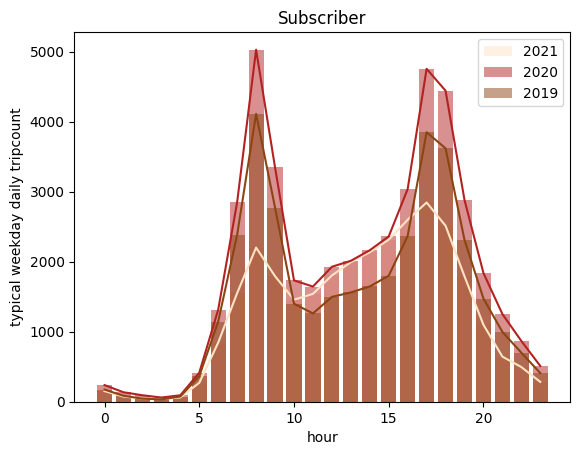

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(hourcount_Sub_wk['hour'],hourcount_Sub_wk['counts_2021'], color='bisque', alpha = 0.5, label = '2021')
plt.plot(hourcount_Sub_wk['hour'],hourcount_Sub_wk['counts_2021'], color='bisque', alpha = 1)
plt.bar(hourcount_Sub_wk['hour'],hourcount_Sub_wk['counts_2020'], color='firebrick', alpha = 0.5, label = '2020')
plt.plot(hourcount_Sub_wk['hour'],hourcount_Sub_wk['counts_2020'], color='firebrick', alpha = 1)
plt.bar(hourcount_Sub_wk['hour'],hourcount_Sub_wk['counts_2019'],color='saddlebrown',alpha = 0.5, label = '2019')
plt.plot(hourcount_Sub_wk['hour'],hourcount_Sub_wk['counts_2019'],color='saddlebrown',alpha = 1)
plt.xlabel('hour')
plt.ylabel('typical weekday daily tripcount')
plt.title('Subscriber')
plt.legend()

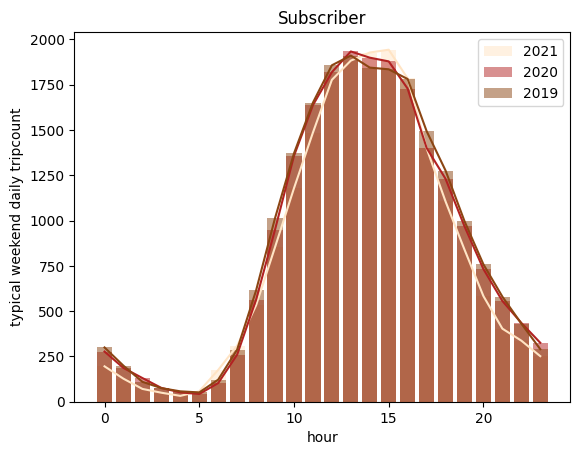

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(hourcount_Sub_wd['hour'],hourcount_Sub_wd['counts_2021'], color='bisque', alpha = 0.5, label = '2021')
plt.plot(hourcount_Sub_wd['hour'],hourcount_Sub_wd['counts_2021'], color='bisque', alpha = 1)
plt.bar(hourcount_Sub_wd['hour'],hourcount_Sub_wd['counts_2020'], color='firebrick', alpha = 0.5, label = '2020')
plt.plot(hourcount_Sub_wd['hour'],hourcount_Sub_wd['counts_2020'], color='firebrick', alpha = 1)
plt.bar(hourcount_Sub_wd['hour'],hourcount_Sub_wd['counts_2019'],color='saddlebrown',alpha = 0.5, label = '2019')
plt.plot(hourcount_Sub_wd['hour'],hourcount_Sub_wd['counts_2019'],color='saddlebrown',alpha = 1)
plt.xlabel('hour')
plt.ylabel('typical weekend daily tripcount')
plt.title('Subscriber')
plt.legend()

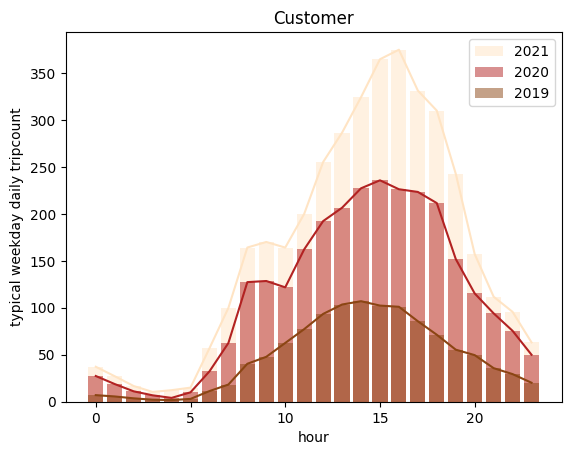

In [28]:
import matplotlib.pyplot as plt
plt.bar(hourcount_Cus_wk['hour'],hourcount_Cus_wk['counts_2021'], color='bisque', alpha = 0.5, label = '2021')
plt.plot(hourcount_Cus_wk['hour'],hourcount_Cus_wk['counts_2021'], color='bisque', alpha = 1)
plt.bar(hourcount_Cus_wk['hour'],hourcount_Cus_wk['counts_2020'], color='firebrick', alpha = 0.5, label = '2020')
plt.plot(hourcount_Cus_wk['hour'],hourcount_Cus_wk['counts_2020'], color='firebrick', alpha = 1)
plt.bar(hourcount_Cus_wk['hour'],hourcount_Cus_wk['counts_2019'],color='saddlebrown',alpha = 0.5, label = '2019')
plt.plot(hourcount_Cus_wk['hour'],hourcount_Cus_wk['counts_2019'],color='saddlebrown',alpha = 1)
plt.xlabel('hour')
plt.ylabel('typical weekday daily tripcount')
plt.title('Customer')
plt.legend()

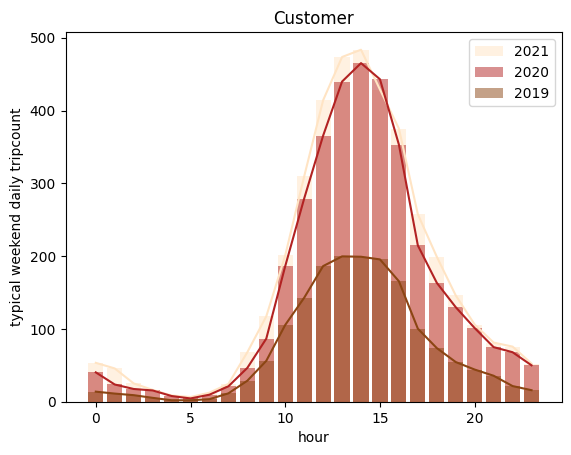

In [29]:
import matplotlib.pyplot as plt
plt.bar(hourcount_Cus_wd['hour'],hourcount_Cus_wd['counts_2021'], color='bisque', alpha = 0.5, label = '2021')
plt.plot(hourcount_Cus_wd['hour'],hourcount_Cus_wd['counts_2021'], color='bisque', alpha = 1)
plt.bar(hourcount_Cus_wd['hour'],hourcount_Cus_wd['counts_2020'], color='firebrick', alpha = 0.5, label = '2020')
plt.plot(hourcount_Cus_wd['hour'],hourcount_Cus_wd['counts_2020'], color='firebrick', alpha = 1)
plt.bar(hourcount_Cus_wd['hour'],hourcount_Cus_wd['counts_2019'],color='saddlebrown',alpha = 0.5, label = '2019')
plt.plot(hourcount_Cus_wd['hour'],hourcount_Cus_wd['counts_2019'],color='saddlebrown',alpha = 1)
plt.xlabel('hour')
plt.ylabel('typical weekend daily tripcount')
plt.title('Customer')
plt.legend()


### Trip Duration Distribution in Typical Day


In [30]:
df_2019_Sub = df_2019_Sub.drop(labels=['usertype'], axis=1)
df_2019_Sub['tripduration'] = df_2019_Sub['tripduration']/60
df_2019_Sub = df_2019_Sub[(df_2019_Sub['tripduration']>0) & (df_2019_Sub['tripduration']<=60)]
df_2019_Sub_wk = df_2019_Sub[df_2019_Sub['day']=='weekday']
df_2019_Sub_wd = df_2019_Sub[df_2019_Sub['day']=='weekend']

df_2020_Sub = df_2020_Sub.drop(labels=['usertype'], axis=1)
df_2020_Sub['tripduration'] = df_2020_Sub['tripduration']/60
df_2020_Sub = df_2020_Sub[(df_2020_Sub['tripduration']>0) & (df_2020_Sub['tripduration']<=60)]
df_2020_Sub_wk = df_2020_Sub[df_2020_Sub['day']=='weekday']
df_2020_Sub_wd = df_2020_Sub[df_2020_Sub['day']=='weekend']

df_2021_Sub = df_2021_Sub.drop(labels=['usertype'], axis=1)
df_2021_Sub['tripduration'] = df_2021_Sub['tripduration']/60
df_2021_Sub = df_2021_Sub[(df_2021_Sub['tripduration']>=0) & (df_2021_Sub['tripduration']<=60)]
df_2021_Sub_wk = df_2021_Sub[df_2021_Sub['day']=='weekday']
df_2021_Sub_wd = df_2021_Sub[df_2021_Sub['day']=='weekend']

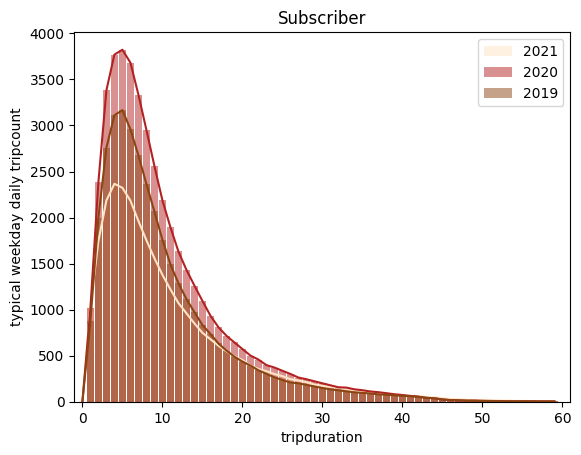

In [31]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Sub_wk[(df_2021_Sub_wk['tripduration']>i) & (df_2021_Sub_wk['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekday'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Sub_wk[(df_2020_Sub_wk['tripduration']>i) & (df_2020_Sub_wk['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekday'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Sub_wk[(df_2019_Sub_wk['tripduration']>i) & (df_2019_Sub_wk['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekday'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekday daily tripcount')
plt.title('Subscriber')
plt.legend()
plt.show()

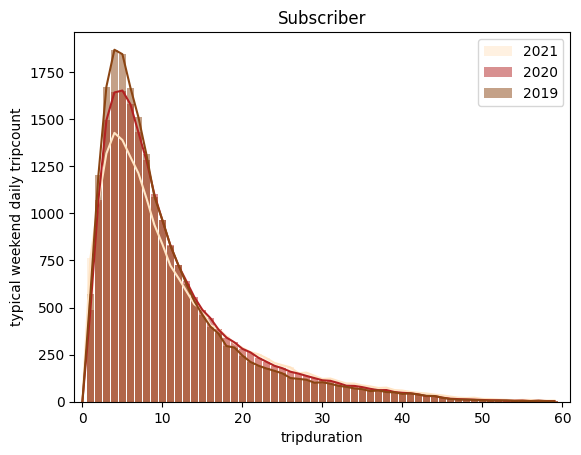

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Sub_wd[(df_2021_Sub_wd['tripduration']>i) & (df_2021_Sub_wd['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekend'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Sub_wd[(df_2020_Sub_wd['tripduration']>i) & (df_2020_Sub_wd['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekend'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Sub_wd[(df_2019_Sub_wd['tripduration']>i) & (df_2019_Sub_wd['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekend'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekend daily tripcount')
plt.title('Subscriber')
plt.legend()
plt.show()

In [33]:
df_2019_Cus = df_2019_Cus.drop(labels=['usertype'], axis=1)
df_2019_Cus['tripduration'] = df_2019_Cus['tripduration']/60
df_2019_Cus = df_2019_Cus[(df_2019_Cus['tripduration']>=0) & (df_2019_Cus['tripduration']<=100)]
df_2019_Cus_wk = df_2019_Cus[df_2019_Cus['day']=='weekday']
df_2019_Cus_wd = df_2019_Cus[df_2019_Cus['day']=='weekend']

df_2020_Cus = df_2020_Cus.drop(labels=['usertype'], axis=1)
df_2020_Cus['tripduration'] = df_2020_Cus['tripduration']/60
df_2020_Cus = df_2020_Cus[(df_2020_Cus['tripduration']>=0) & (df_2020_Cus['tripduration']<=100)]
df_2020_Cus_wk = df_2020_Cus[df_2020_Cus['day']=='weekday']
df_2020_Cus_wd = df_2020_Cus[df_2020_Cus['day']=='weekend']

df_2021_Cus = df_2021_Cus.drop(labels=['usertype'], axis=1)
df_2021_Cus['tripduration'] = df_2021_Cus['tripduration']/60
df_2021_Cus = df_2021_Cus[(df_2021_Cus['tripduration']>=0) & (df_2021_Cus['tripduration']<=100)]
df_2021_Cus_wk = df_2021_Cus[df_2021_Cus['day']=='weekday']
df_2021_Cus_wd = df_2021_Cus[df_2021_Cus['day']=='weekend']

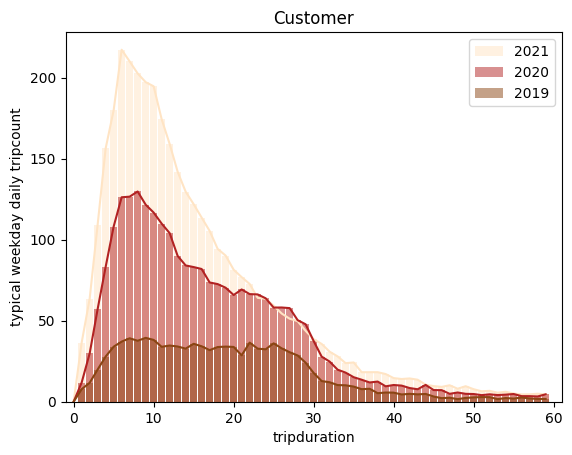

In [34]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Cus_wk[(df_2021_Cus_wk['tripduration']>i) & (df_2021_Cus_wk['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekday'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Cus_wk[(df_2020_Cus_wk['tripduration']>i) & (df_2020_Cus_wk['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekday'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Cus_wk[(df_2019_Cus_wk['tripduration']>i) & (df_2019_Cus_wk['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekday'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekday daily tripcount')
plt.title('Customer')
plt.legend()
plt.show()

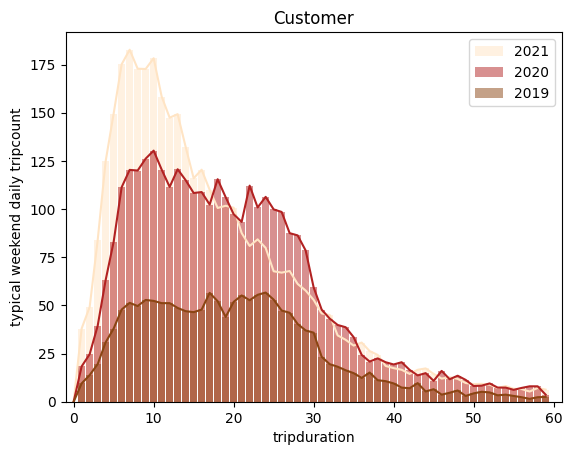

In [35]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Cus_wd[(df_2021_Cus_wd['tripduration']>i) & (df_2021_Cus_wd['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekend'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Cus_wd[(df_2020_Cus_wd['tripduration']>i) & (df_2020_Cus_wd['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekend'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Cus_wd[(df_2019_Cus_wd['tripduration']>i) & (df_2019_Cus_wd['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekend'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekend daily tripcount')
plt.title('Customer')
plt.legend()
plt.show()


### Trip Duration Distribution in peak/nonpeak hour in Typical Day

#### Subscriber


In [36]:
peak_hour_Sub_wk = [7,8,9,16,17,18,19]
non_peak_hour_Sub_wk = [0,1,2,3,4,5,6,10,11,12,13,14,15,20,21,22,23]
peak_hour_Sub_wd = [12,13,14,15,16,17,18]
non_peak_hour_Sub_wd = [0,1,2,3,4,5,6,7,8,9,10,11,19,20,21,22,23]

In [37]:
df_2019_Sub_wk_peak = df_2019_Sub_wk[df_2019_Sub_wk['hour'].isin(peak_hour_Sub_wk)]
df_2019_Sub_wk_nonpeak = df_2019_Sub_wk[df_2019_Sub_wk['hour'].isin(non_peak_hour_Sub_wk)]
df_2019_Sub_wd_peak = df_2019_Sub_wd[df_2019_Sub_wd['hour'].isin(peak_hour_Sub_wd)]
df_2019_Sub_wd_nonpeak = df_2019_Sub_wd[df_2019_Sub_wd['hour'].isin(non_peak_hour_Sub_wd)]
df_2020_Sub_wk_peak = df_2020_Sub_wk[df_2020_Sub_wk['hour'].isin(peak_hour_Sub_wk)]
df_2020_Sub_wk_nonpeak = df_2020_Sub_wk[df_2020_Sub_wk['hour'].isin(non_peak_hour_Sub_wk)]
df_2020_Sub_wd_peak = df_2020_Sub_wd[df_2020_Sub_wd['hour'].isin(peak_hour_Sub_wd)]
df_2020_Sub_wd_nonpeak = df_2020_Sub_wd[df_2020_Sub_wd['hour'].isin(non_peak_hour_Sub_wd)]
df_2021_Sub_wk_peak = df_2021_Sub_wk[df_2021_Sub_wk['hour'].isin(peak_hour_Sub_wk)]
df_2021_Sub_wk_nonpeak = df_2021_Sub_wk[df_2021_Sub_wk['hour'].isin(non_peak_hour_Sub_wk)]
df_2021_Sub_wd_peak = df_2021_Sub_wd[df_2021_Sub_wd['hour'].isin(peak_hour_Sub_wd)]
df_2021_Sub_wd_nonpeak = df_2021_Sub_wd[df_2021_Sub_wd['hour'].isin(non_peak_hour_Sub_wd)]

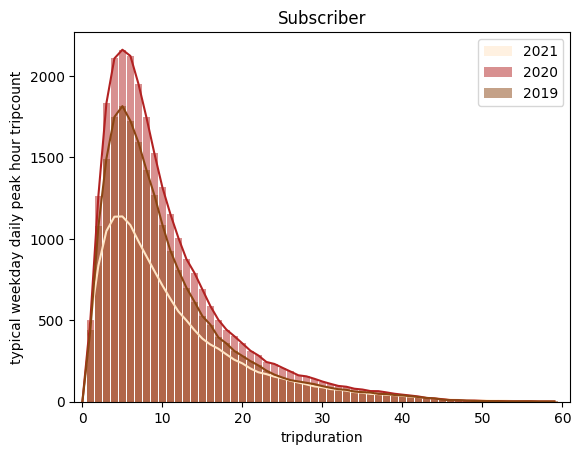

In [38]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Sub_wk_peak[(df_2021_Sub_wk_peak['tripduration']>i) & (df_2021_Sub_wk_peak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekday'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Sub_wk_peak[(df_2020_Sub_wk_peak['tripduration']>i) & (df_2020_Sub_wk_peak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekday'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Sub_wk_peak[(df_2019_Sub_wk_peak['tripduration']>i) & (df_2019_Sub_wk_peak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekday'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekday daily peak hour tripcount')
plt.title('Subscriber')
plt.legend()
plt.show()

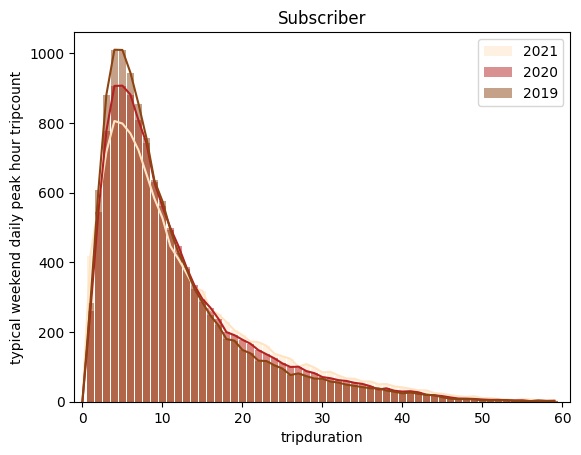

In [39]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Sub_wd_peak[(df_2021_Sub_wd_peak['tripduration']>i) & (df_2021_Sub_wd_peak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekend'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Sub_wd_peak[(df_2020_Sub_wd_peak['tripduration']>i) & (df_2020_Sub_wd_peak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekend'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Sub_wd_peak[(df_2019_Sub_wd_peak['tripduration']>i) & (df_2019_Sub_wd_peak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekend'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekend daily peak hour tripcount')
plt.title('Subscriber')
plt.legend()
plt.show()

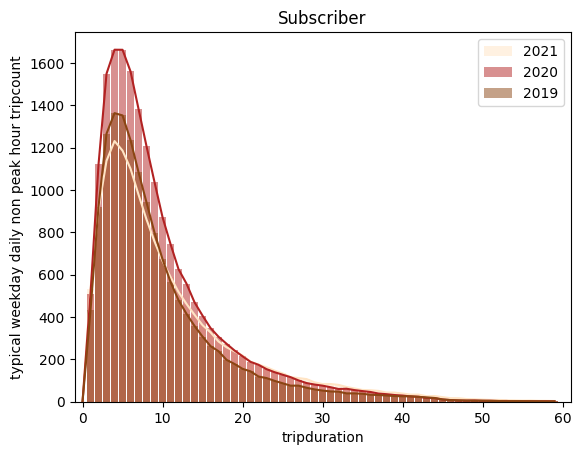

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Sub_wk_nonpeak[(df_2021_Sub_wk_nonpeak['tripduration']>i) & (df_2021_Sub_wk_nonpeak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekday'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Sub_wk_nonpeak[(df_2020_Sub_wk_nonpeak['tripduration']>i) & (df_2020_Sub_wk_nonpeak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekday'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Sub_wk_nonpeak[(df_2019_Sub_wk_nonpeak['tripduration']>i) & (df_2019_Sub_wk_nonpeak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekday'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekday daily non peak hour tripcount')
plt.title('Subscriber')
plt.legend()
plt.show()

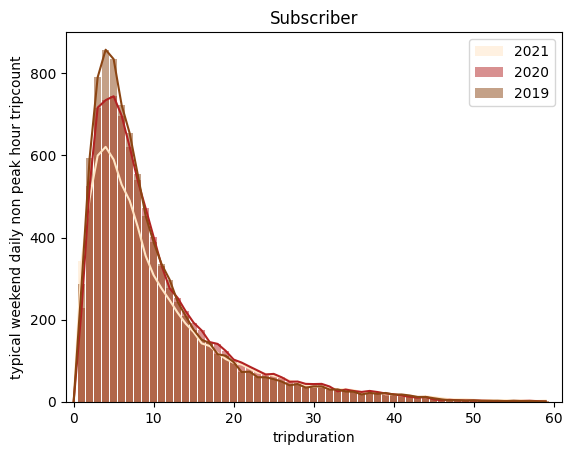

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Sub_wd_nonpeak[(df_2021_Sub_wd_nonpeak['tripduration']>i) & (df_2021_Sub_wd_nonpeak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekend'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Sub_wd_nonpeak[(df_2020_Sub_wd_nonpeak['tripduration']>i) & (df_2020_Sub_wd_nonpeak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekend'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Sub_wd_nonpeak[(df_2019_Sub_wd_nonpeak['tripduration']>i) & (df_2019_Sub_wd_nonpeak['tripduration']<=i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekend'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekend daily non peak hour tripcount')
plt.title('Subscriber')
plt.legend()
plt.show()

#### Customer

In [42]:
peak_hour_Cus_wk = [16,17,18,19]
non_peak_hour_Cus_wk = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,21,22,23]
peak_hour_Cus_wd = [12,13,14,15,16,17,18]
non_peak_hour_Cus_wd = [0,1,2,3,4,5,6,7,8,9,10,11,19,20,21,22,23]

In [43]:
df_2019_Cus_wk_peak = df_2019_Cus_wk[df_2019_Cus_wk['hour'].isin(peak_hour_Cus_wk)]
df_2019_Cus_wk_nonpeak = df_2019_Cus_wk[df_2019_Cus_wk['hour'].isin(non_peak_hour_Cus_wk)]
df_2019_Cus_wd_peak = df_2019_Cus_wd[df_2019_Cus_wd['hour'].isin(peak_hour_Cus_wd)]
df_2019_Cus_wd_nonpeak = df_2019_Cus_wd[df_2019_Cus_wd['hour'].isin(non_peak_hour_Cus_wd)]
df_2020_Cus_wk_peak = df_2020_Cus_wk[df_2020_Cus_wk['hour'].isin(peak_hour_Cus_wk)]
df_2020_Cus_wk_nonpeak = df_2020_Cus_wk[df_2020_Cus_wk['hour'].isin(non_peak_hour_Cus_wk)]
df_2020_Cus_wd_peak = df_2020_Cus_wd[df_2020_Cus_wd['hour'].isin(peak_hour_Cus_wd)]
df_2020_Cus_wd_nonpeak = df_2020_Cus_wd[df_2020_Cus_wd['hour'].isin(non_peak_hour_Cus_wd)]
df_2021_Cus_wk_peak = df_2021_Cus_wk[df_2021_Cus_wk['hour'].isin(peak_hour_Cus_wk)]
df_2021_Cus_wk_nonpeak = df_2021_Cus_wk[df_2021_Cus_wk['hour'].isin(non_peak_hour_Cus_wk)]
df_2021_Cus_wd_peak = df_2021_Cus_wd[df_2021_Cus_wd['hour'].isin(peak_hour_Cus_wd)]
df_2021_Cus_wd_nonpeak = df_2021_Cus_wd[df_2021_Cus_wd['hour'].isin(non_peak_hour_Cus_wd)]

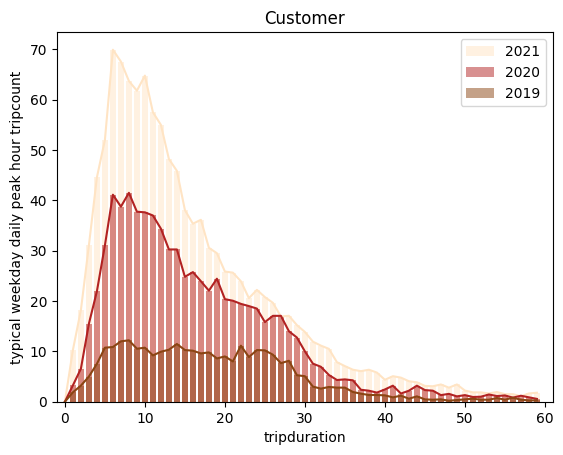

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Cus_wk_peak[(df_2021_Cus_wk_peak['tripduration']>i) & (df_2021_Cus_wk_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekday'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Cus_wk_peak[(df_2020_Cus_wk_peak['tripduration']>i) & (df_2020_Cus_wk_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekday'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Cus_wk_peak[(df_2019_Cus_wk_peak['tripduration']>i) & (df_2019_Cus_wk_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekday'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekday daily peak hour tripcount')
plt.title('Customer')
plt.legend()
plt.show()

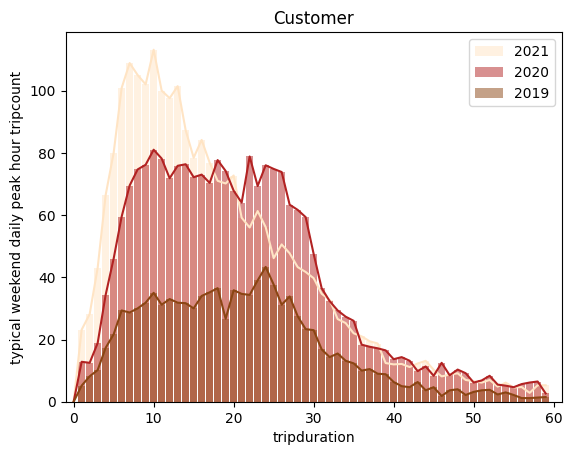

In [45]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Cus_wd_peak[(df_2021_Cus_wd_peak['tripduration']>i) & (df_2021_Cus_wd_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekend'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Cus_wd_peak[(df_2020_Cus_wd_peak['tripduration']>i) & (df_2020_Cus_wd_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekend'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Cus_wd_peak[(df_2019_Cus_wd_peak['tripduration']>i) & (df_2019_Cus_wd_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekend'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekend daily peak hour tripcount')
plt.title('Customer')
plt.legend()
plt.show()

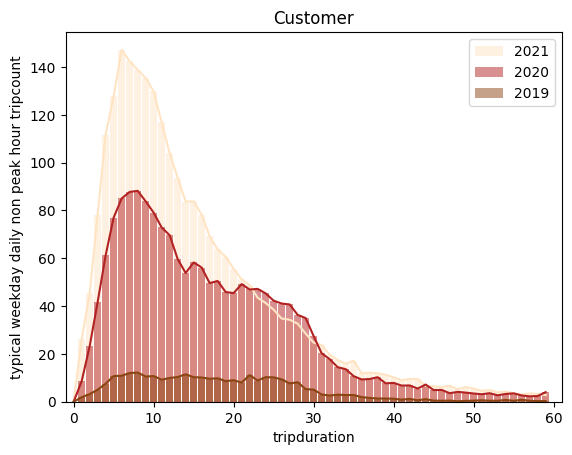

In [46]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Cus_wk_nonpeak[(df_2021_Cus_wk_nonpeak['tripduration']>i) & (df_2021_Cus_wk_nonpeak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekday'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Cus_wk_nonpeak[(df_2020_Cus_wk_nonpeak['tripduration']>i) & (df_2020_Cus_wk_nonpeak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekday'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Cus_wk_peak[(df_2019_Cus_wk_peak['tripduration']>i) & (df_2019_Cus_wk_peak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekday'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekday daily non peak hour tripcount')
plt.title('Customer')
plt.legend()
plt.show()

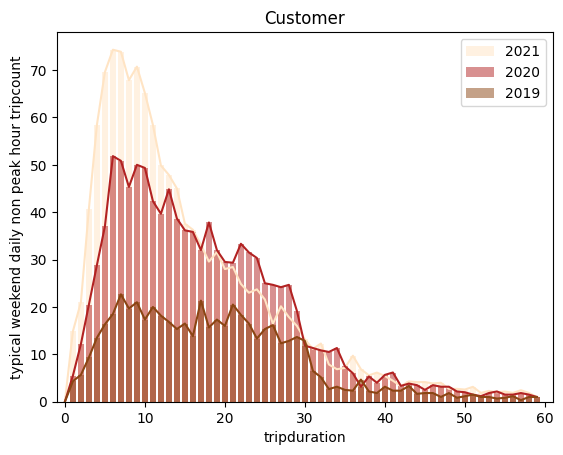

In [47]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlim(-1, 61)

x = []
y = []
for i in range(60):
    duration = df_2021_Cus_wd_nonpeak[(df_2021_Cus_wd_nonpeak['tripduration']>i) & (df_2021_Cus_wd_nonpeak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2021['weekend'])
plt.bar(x, y, color='bisque', alpha = 0.5, label = '2021')
plt.plot(x, y, color='bisque', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2020_Cus_wd_nonpeak[(df_2020_Cus_wd_nonpeak['tripduration']>i) & (df_2020_Cus_wd_nonpeak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2020['weekend'])
plt.bar(x, y, color='firebrick', alpha = 0.5, label = '2020')
plt.plot(x, y, color='firebrick', alpha = 1)

x = []
y = []
for i in range(60):
    duration = df_2019_Cus_wd_nonpeak[(df_2019_Cus_wd_nonpeak['tripduration']>i) & (df_2019_Cus_wd_nonpeak['tripduration']<i+1)]
    x.append(i)
    y.append(len(duration)/day_2019['weekend'])
plt.bar(x, y, color='saddlebrown', alpha = 0.5, label = '2019')
plt.plot(x, y, color='saddlebrown', alpha = 1)

plt.xlabel('tripduration')
plt.ylabel('typical weekend daily non peak hour tripcount')
plt.title('Customer')
plt.legend()
plt.show()


#### Density Distribution for Trip Duration


In [48]:
df_2019_Sub_wk_peak['starttime'] = '2019'
df_2019_Sub_wd_peak['starttime'] = '2019'
df_2019_Sub_wk_nonpeak['starttime'] = '2019'
df_2019_Sub_wd_nonpeak['starttime'] = '2019'
df_2020_Sub_wk_peak['starttime'] = '2020'
df_2020_Sub_wd_peak['starttime'] = '2020'
df_2020_Sub_wk_nonpeak['starttime'] = '2020'
df_2020_Sub_wd_nonpeak['starttime'] = '2020'
df_2021_Sub_wk_peak['starttime'] = '2021'
df_2021_Sub_wd_peak['starttime'] = '2021'
df_2021_Sub_wk_nonpeak['starttime'] = '2021'
df_2021_Sub_wd_nonpeak['starttime'] = '2021'
df_2019_Cus_wk_peak['starttime'] = '2019'
df_2019_Cus_wd_peak['starttime'] = '2019'
df_2019_Cus_wk_nonpeak['starttime'] = '2019'
df_2019_Cus_wd_nonpeak['starttime'] = '2019'
df_2020_Cus_wk_peak['starttime'] = '2020'
df_2020_Cus_wd_peak['starttime'] = '2020'
df_2020_Cus_wk_nonpeak['starttime'] = '2020'
df_2020_Cus_wd_nonpeak['starttime'] = '2020'
df_2021_Cus_wk_peak['starttime'] = '2021'
df_2021_Cus_wd_peak['starttime'] = '2021'
df_2021_Cus_wk_nonpeak['starttime'] = '2021'
df_2021_Cus_wd_nonpeak['starttime'] = '2021'

C:\Users\24707\AppData\Local\Temp\ipykernel_22376\57966206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Sub_wk_peak['starttime'] = '2019'
C:\Users\24707\AppData\Local\Temp\ipykernel_22376\57966206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Sub_wd_peak['starttime'] = '2019'
C:\Users\24707\AppData\Local\Temp\ipykernel_22376\57966206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [49]:
df_Sub_wk_peak = pd.concat([df_2019_Sub_wk_peak,df_2020_Sub_wk_peak,df_2021_Sub_wk_peak])
df_Sub_wd_peak = pd.concat([df_2019_Sub_wd_peak,df_2020_Sub_wd_peak,df_2021_Sub_wd_peak])
df_Sub_peak = pd.concat([df_Sub_wk_peak,df_Sub_wd_peak])

df_Sub_wk_nonpeak = pd.concat([df_2019_Sub_wk_nonpeak,df_2020_Sub_wk_nonpeak,df_2021_Sub_wk_nonpeak])
df_Sub_wd_nonpeak = pd.concat([df_2019_Sub_wd_nonpeak,df_2020_Sub_wd_nonpeak,df_2021_Sub_wd_nonpeak])
df_Sub_nonpeak = pd.concat([df_Sub_wk_nonpeak,df_Sub_wd_nonpeak])

df_Cus_wk_peak = pd.concat([df_2019_Cus_wk_peak,df_2020_Cus_wk_peak,df_2021_Cus_wk_peak])
df_Cus_wd_peak = pd.concat([df_2019_Cus_wd_peak,df_2020_Cus_wd_peak,df_2021_Cus_wd_peak])
df_Cus_peak = pd.concat([df_Cus_wk_peak,df_Cus_wd_peak])

df_Cus_wk_nonpeak = pd.concat([df_2019_Cus_wk_nonpeak,df_2020_Cus_wk_nonpeak,df_2021_Cus_wk_nonpeak])
df_Cus_wd_nonpeak = pd.concat([df_2019_Cus_wd_nonpeak,df_2020_Cus_wd_nonpeak,df_2021_Cus_wd_nonpeak])
df_Cus_nonpeak = pd.concat([df_Cus_wk_nonpeak,df_Cus_wd_nonpeak])


In [50]:
df_Sub_peak = df_Sub_peak.astype({'starttime':'string'})
df_Sub_peak = df_Sub_peak.drop(labels=['hour'],axis=1)
df_Sub_peak = df_Sub_peak.reset_index(drop=True)
df_Sub_peak.rename(columns={'starttime':'year'},inplace=True)
df_Sub_peak['peak hour'] = 'peak'

df_Sub_nonpeak = df_Sub_nonpeak.astype({'starttime':'string'})
df_Sub_nonpeak = df_Sub_nonpeak.drop(labels=['hour'],axis=1)
df_Sub_nonpeak = df_Sub_nonpeak.reset_index(drop=True)
df_Sub_nonpeak.rename(columns={'starttime':'year'},inplace=True)
df_Sub_nonpeak['peak hour'] = 'non peak'

In [51]:
df_Cus_peak = df_Cus_peak.astype({'starttime':'string'})
df_Cus_peak = df_Cus_peak.drop(labels=['hour'],axis=1)
df_Cus_peak = df_Cus_peak.reset_index(drop=True)
df_Cus_peak.rename(columns={'starttime':'year'},inplace=True)
df_Cus_peak['peak hour'] = 'peak'

df_Cus_nonpeak = df_Cus_nonpeak.astype({'starttime':'string'})
df_Cus_nonpeak = df_Cus_nonpeak.drop(labels=['hour'],axis=1)
df_Cus_nonpeak = df_Cus_nonpeak.reset_index(drop=True)
df_Cus_nonpeak.rename(columns={'starttime':'year'},inplace=True)
df_Cus_nonpeak['peak hour'] = 'non peak'

In [52]:
df_Sub = pd.concat([df_Sub_peak,df_Sub_nonpeak])
df_Sub = df_Sub.reset_index(drop=True)
df_Sub

,tripduration,year,day,peak hour
0,9.300000,2019,weekday,peak
1,6.566667,2019,weekday,peak
2,12.700000,2019,weekday,peak
3,44.433333,2019,weekday,peak
4,9.500000,2019,weekday,peak
...,...,...,...,...
2067051,3.916667,2021,weekend,non peak
2067052,4.850000,2021,weekend,non peak
2067053,4.766667,2021,weekend,non peak
2067054,5.166667,2021,weekend,non peak


In [53]:
df_Cus = pd.concat([df_Cus_peak,df_Cus_nonpeak])
df_Cus = df_Cus.reset_index(drop=True)
df_Cus

,tripduration,year,day,peak hour
0,33.150000,2019,weekday,peak
1,5.466667,2019,weekday,peak
2,5.500000,2019,weekday,peak
3,25.933333,2019,weekday,peak
4,14.783333,2019,weekday,peak
...,...,...,...,...
172787,5.700000,2021,weekend,non peak
172788,37.866667,2021,weekend,non peak
172789,8.400000,2021,weekend,non peak
172790,8.400000,2021,weekend,non peak


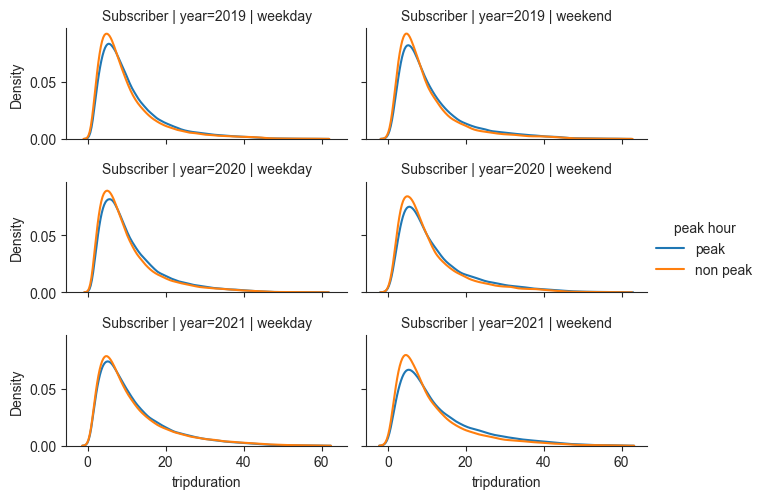

In [54]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("darkgrid")
sns.set_style("white")
sns.set_style("ticks")
g = sns.FacetGrid(df_Sub, row="year", row_order=['2019','2020','2021'], col='day',
                  height=1.7, aspect=2, hue='peak hour')
g.map(sns.kdeplot, "tripduration", common_norm=False)
g.add_legend()
g.set_titles(template='Subscriber | year={row_name} | {col_name}')

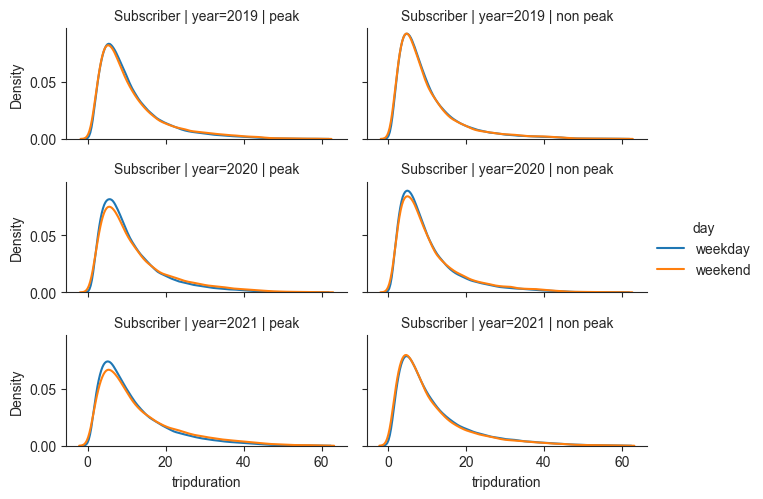

In [55]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("darkgrid")
sns.set_style("white")
sns.set_style("ticks")
g = sns.FacetGrid(df_Sub, row="year", row_order=['2019','2020','2021'], col='peak hour',
                  height=1.7, aspect=2, hue='day')
g.map(sns.kdeplot, "tripduration", common_norm=False)
g.add_legend()
g.set_titles(template='Subscriber | year={row_name} | {col_name}')

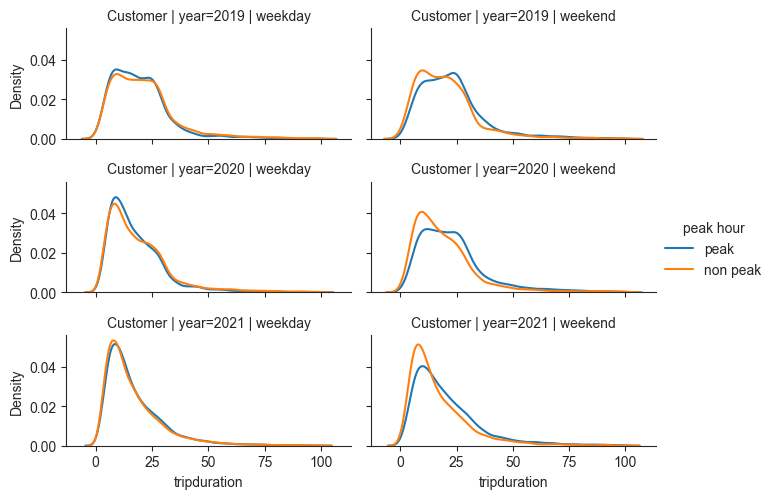

In [56]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("darkgrid")
sns.set_style("white")
sns.set_style("ticks")
g = sns.FacetGrid(df_Cus, row="year", row_order=['2019','2020','2021'], col='day',
                  height=1.7, aspect=2, hue='peak hour')
g.map(sns.kdeplot, "tripduration", common_norm=False)
g.add_legend()
g.set_titles(template='Customer | year={row_name} | {col_name}')

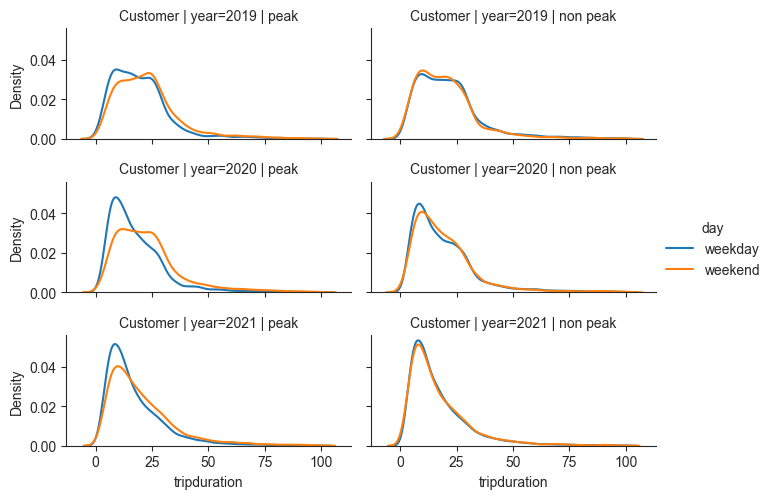

In [57]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("dark")
sns.set_style("darkgrid")
sns.set_style("white")
sns.set_style("ticks")
g = sns.FacetGrid(df_Cus, row="year", row_order=['2019','2020','2021'], col='peak hour',
                  height=1.7, aspect=2, hue='day')
g.map(sns.kdeplot, "tripduration", common_norm=False)
g.add_legend()
g.set_titles(template='Customer | year={row_name} | {col_name}')